# Explore here

In [14]:
# Your code here
import zipfile
import requests
from PIL import Image
import matplotlib.pyplot as plt
import os

In [15]:
#donwload the dataset
url = 'https://storage.googleapis.com/datascience-materials/dogs-vs-cats.zip'

response = requests.get(url, stream=True)

with open('../data/raw/dogs-vs-cats.zip', 'wb') as rute:
    for chunk in response.iter_content(chunk_size=8192):
        if chunk:
            rute.write(chunk)
with zipfile.ZipFile('../data/raw/dogs-vs-cats.zip', 'r') as zip_ref:
    zip_ref.extractall('../data/interim/')

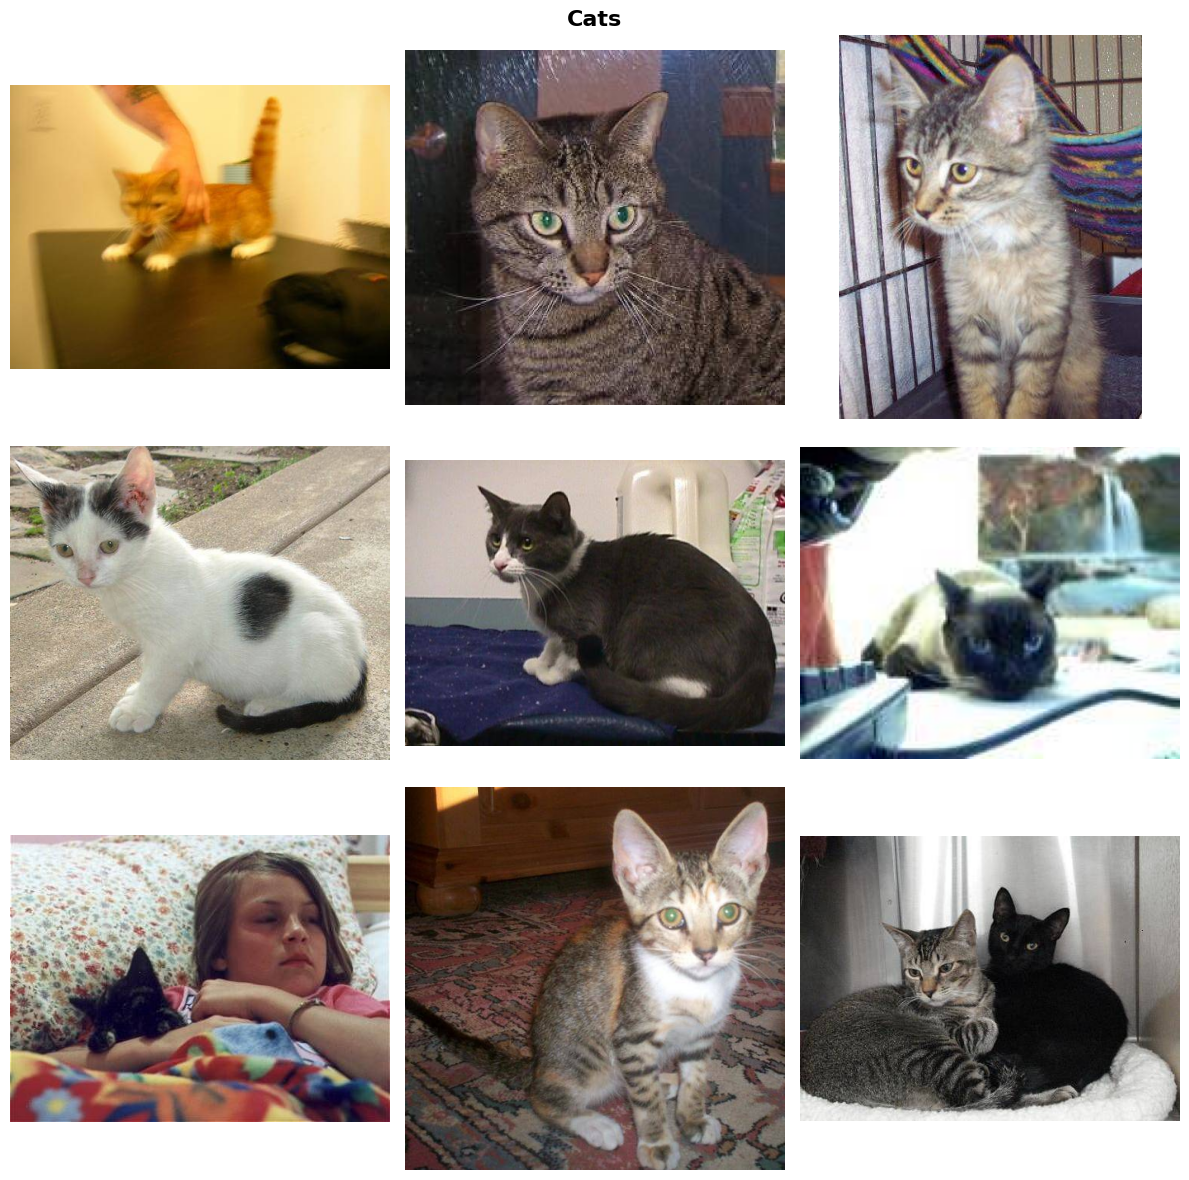

In [16]:
#see the data

# Cats images
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
fig.suptitle('Cats', fontsize=16, fontweight='bold')

for idx in range(9):
    img = Image.open(f'../data/interim/dogs-vs-cats/train/cat.{idx}.jpg')
    row = idx // 3
    col = idx % 3
    axes[row, col].imshow(img)
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

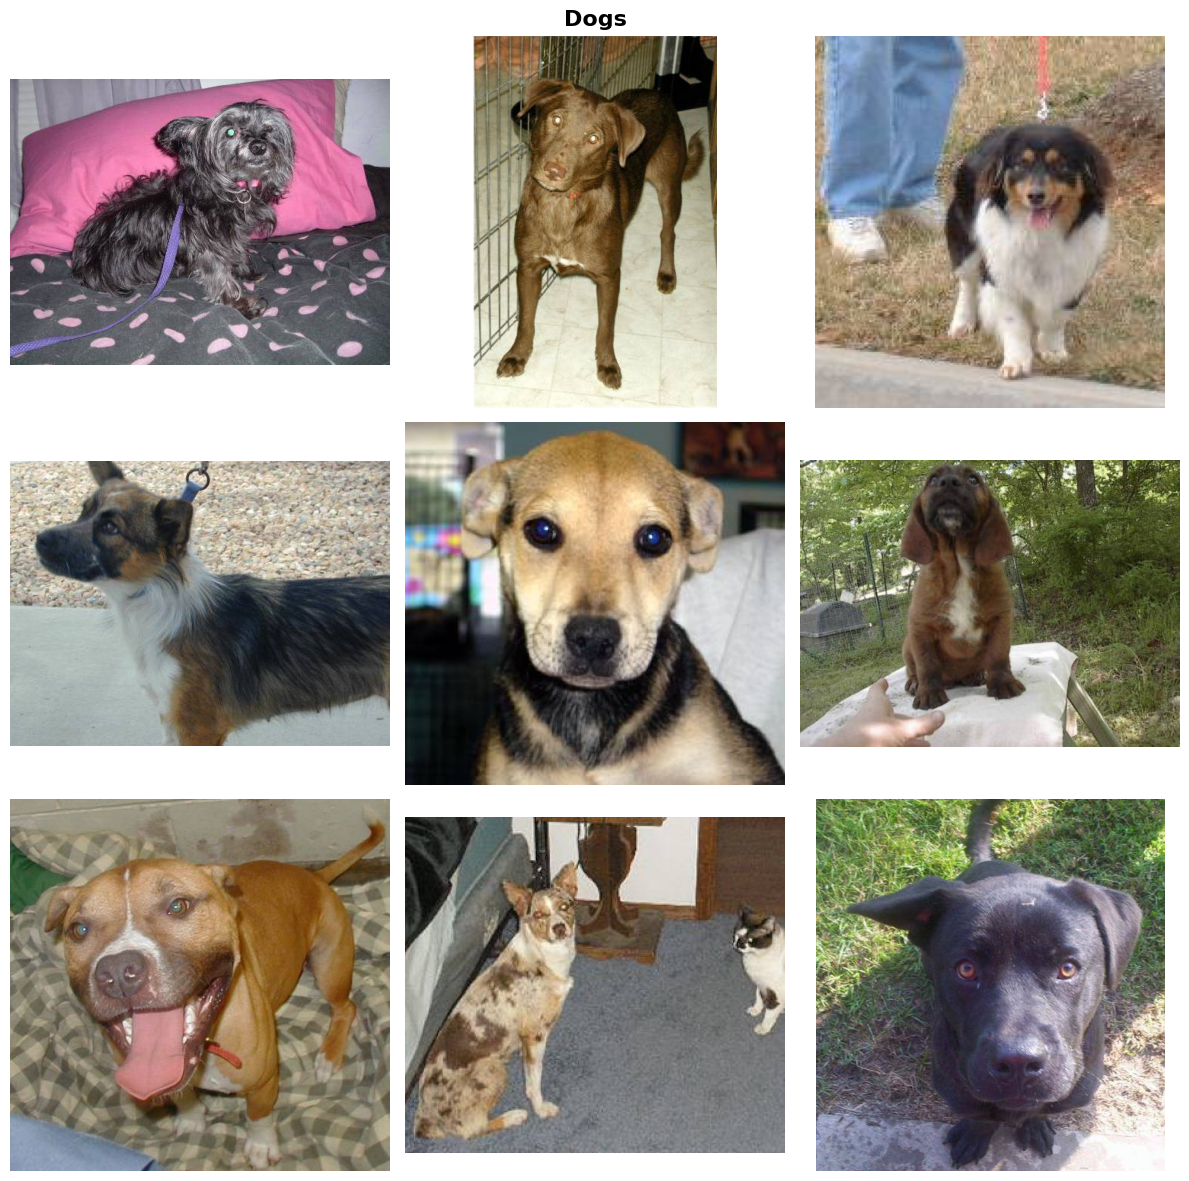

In [17]:
# Dog images
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
fig.suptitle('Dogs', fontsize=16, fontweight='bold')

for idx in range(9):
    img = Image.open(f'../data/interim/dogs-vs-cats/train/dog.{idx}.jpg')
    row = idx // 3
    col = idx % 3
    axes[row, col].imshow(img)
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
#reshape all images
input_path = '../data/interim/dogs-vs-cats/train/'
output_path_train = '../data/processed/train/'
output_path_test = '../data/processed/test/'

os.makedirs(output_path_train, exist_ok=True) #Creates the output path
os.makedirs(output_path_test, exist_ok=True) #Creates the output path

#dogs and cats train and test divisions
train_dogs = os.path.join(output_path_train, 'dogs')
train_cats = os.path.join(output_path_train, 'cats')
test_dogs = os.path.join(output_path_test, 'dogs')
test_cats = os.path.join(output_path_test, 'cats')

os.makedirs(train_dogs, exist_ok=True)
os.makedirs(train_cats, exist_ok=True)
os.makedirs(test_dogs, exist_ok=True)
os.makedirs(test_cats, exist_ok=True)

#separate all files into cat or dogs
all_files = [i for i in os.listdir(input_path)]
dog_files = sorted([f for f in all_files if f.startswith('dog')])
cat_files = sorted([f for f in all_files if f.startswith('cat')])


count = 0
#cats files
for file in cat_files:
    input_file = os.path.join(input_path, file)
    
    if count < 8:
        #train files
        output_file = os.path.join(train_cats, file)
        img = Image.open(input_file).convert('RGB')
        resized = img.resize((200, 200))
        resized.save(output_file)
        count += 1

    else:
        #test files
        output_file = os.path.join(test_cats, file)
        img = Image.open(input_file).convert('RGB')
        resized = img.resize((200, 200))
        resized.save(output_file)
        count = 0

count = 0
#dog files
for file in dog_files:
    input_file = os.path.join(input_path, file)
    
    if count < 8:
        #train files
        output_file = os.path.join(train_dogs, file)
        img = Image.open(input_file).convert('RGB')
        resized = img.resize((200, 200))
        resized.save(output_file)
        count += 1

    else:
        #test files
        output_file = os.path.join(test_dogs, file)
        img = Image.open(input_file).convert('RGB')
        resized = img.resize((200, 200))
        resized.save(output_file)
        count = 0


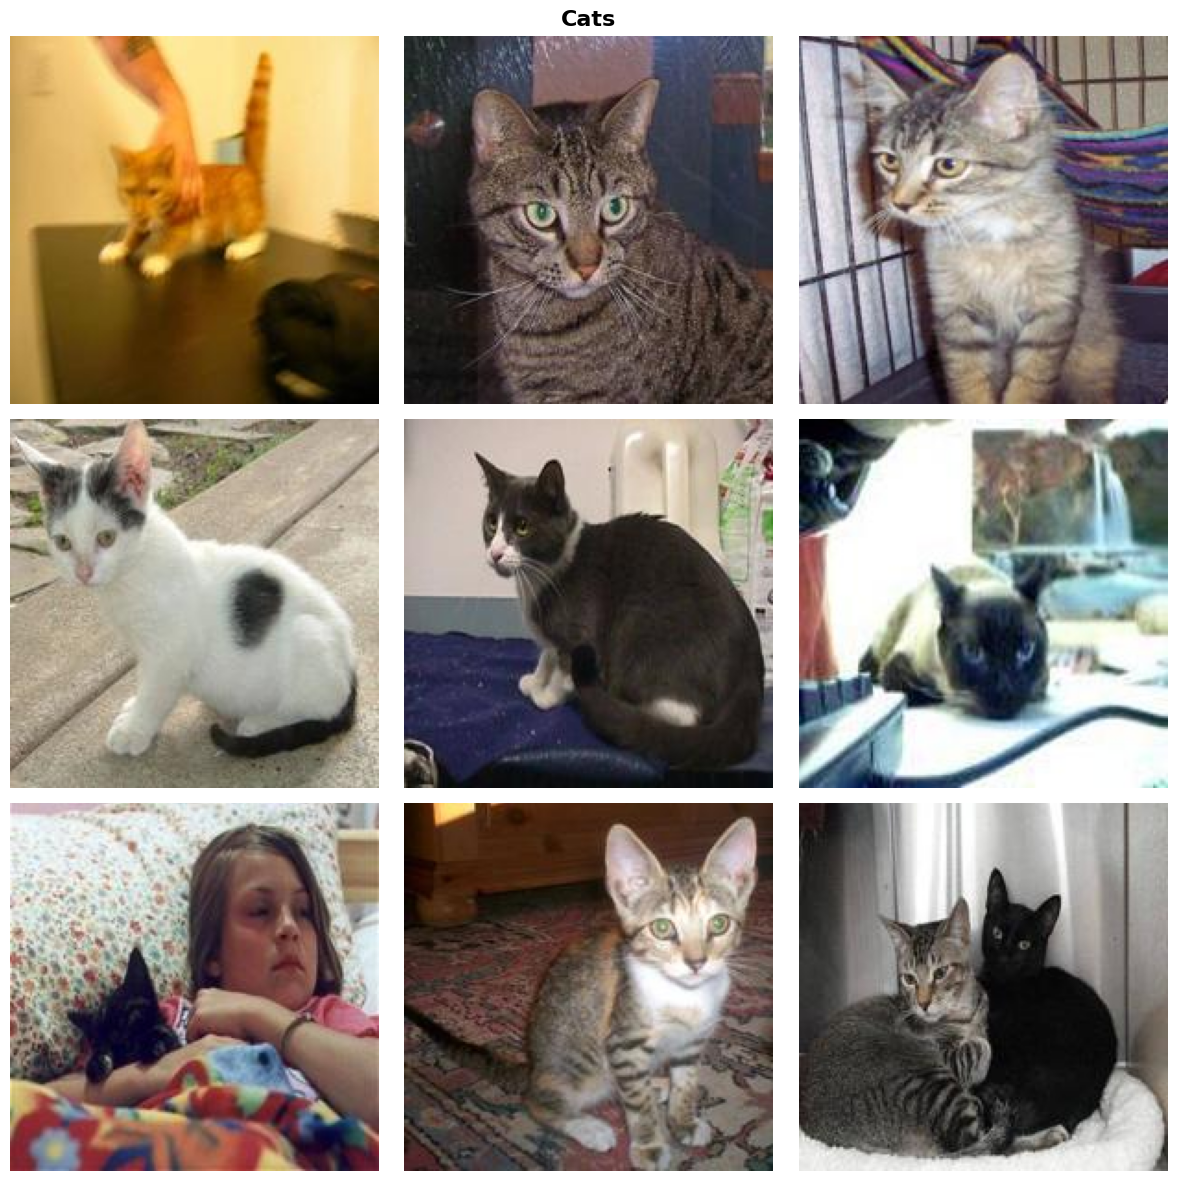

In [24]:
#let's see the result

# Cats images
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
fig.suptitle('Cats', fontsize=16, fontweight='bold')

for idx in range(9):
    img = Image.open(f'../data/processed/train/cats/cat.{idx}.jpg')
    row = idx // 3
    col = idx % 3
    axes[row, col].imshow(img)
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

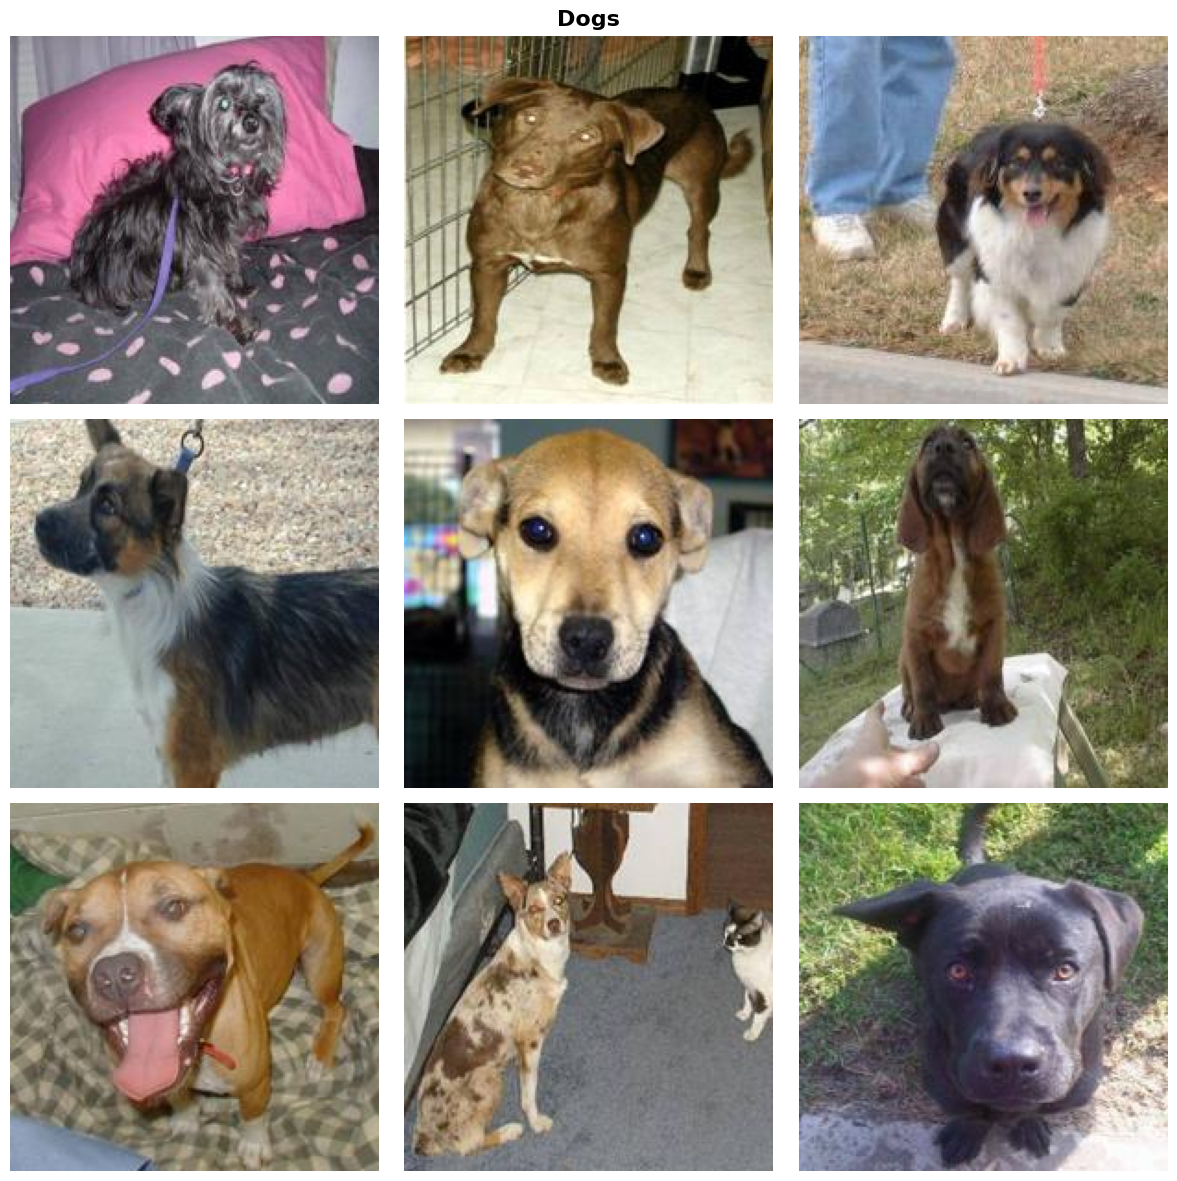

In [27]:
# Dogs images
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
fig.suptitle('Dogs', fontsize=16, fontweight='bold')

for idx in range(9):
    img = Image.open(f'../data/processed/train/dogs/dog.{idx}.jpg')
    row = idx // 3
    col = idx % 3
    axes[row, col].imshow(img)
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()